# Inspecting simulated TOF data

## Initial functions setup

In [1]:
import numpy as np
from matplotlib.pylab import *
%matplotlib inline

In [2]:
### Load scenes, setup ###
def getScenes(fname):
    if (fname.find("rain") > 0):
        scenes = [line.strip() for line in open(dataPath + "train.txt", 'r')]
    elif (fname.find("est") > 0): 
        scenes = [line.strip() for line in open(dataPath + "test.txt", 'r')]
    else: 
        print("Either training set or test set should be chosen.")
        raise ValueError("Noncompliant input: must be \"Train\" or \"Test\"") 
    print("%i scenes"%len(scenes))
    return scenes; 

def getAllScenes(dataPath = "./"):
    scenes = [line.strip() for line in open(dataPath + "allScenes.txt", 'r')]
    return scenes; 

def loglorentzian(x, s=1.0):
    return np.exp(-np.log(1 + s * x**2))

def lorentzian(x,s=1.0):
    return np.log(1 + s * x**2)

def getVal(default):
    r = input().strip()
    if r == '':
        return default
    else:
        return r

In [3]:
### Plot gathered statistics ###
def displayErrHistogram(S):
    T = np.array(S)
    plt.hist(T[:,2], bins = 30); plt.title('Histogram of error means'); plt.xlabel("Mean deviation [m]");  
    plt.show()
    
def displayErrDistribution(E, H): 
    ErrV = E[:-1]
    P = H/np.sum(H); 
    P /= np.max(P); 
    plt.figure(figsize=(12,4))
    for i, pl in enumerate((plt.semilogy, plt.plot)):
        plt.subplot(1, 2, i + 1)
        pl(ErrV, P)
        pl(ErrV, loglorentzian(ErrV, 50)) # 50 fits empirical data
        plt.xlabel("Deviation [m]"); 
        plt.ylabel("Normalized likelihood")
    plt.show()
    
def displayErrDistributionZoomed(E, H, percentage=25):
    ErrV = E[:-1]
    tot = int(len(E)/2)
    # plot distribution of errors (as a pdf)
    P = H/(np.sum(H)); 
    P /= np.max(P) # needed to normalize likelihood distribution (otherwise, maximum is 0.09 = 9 % )
    plt.figure(figsize=(12,4))
    b = int(1/100*percentage*tot); idx = np.r_[tot-b:tot+b]
    for i,pl in enumerate((plt.semilogy, plt.plot)):
        plt.subplot(1,2,i+1)
        pl(ErrV[idx],P[idx])
        pl(ErrV[idx], loglorentzian(ErrV[idx], 50))
        plt.xlabel("Deviation [m]"); 
        plt.ylabel("Normalized likelihood")
    plt.show()

In [4]:
### Generate statistics looking at data ###
def analyseScene(scene, H, S, hist_range = (-7.3,7.3), nbins = 1000, shift = True): 
    D = np.loadtxt("%simages/%s.dlm"%(dataPath, scene))
    G = np.loadtxt("%slabels/%s.dlm"%(dataPath, scene))
    diff = D[:, 8:1800:9] - G; 
    F = diff.flatten()
    S.append([np.min(diff), np.max(F), np.mean(F), np.median(F)])
    if (shift): 
        F -= F.mean()
    h, E = np.histogram(F, bins=1000, range=(-7.3, 7.3))
    H += h
    return E, H, S; 

def analyseSet(sceneSet, hist_range = (-7.3, 7.3), nbins = 1000, shifting = True):
    E, S, H = 0, [], 0; 
    for scene in sceneSet: 
        E, H, S = analyseScene(scene, H, S, hist_range, nbins, shifting); 
    return E, S, H; 

# Starting Analysis

In [5]:
print("Please enter path to data: [/Users/jvlatzko/Dropbox/Uni/Diplomarbeit/depth_data]")
dataPath = getVal("depth_data/ToF-data/wholeset/")
trainScenes = getScenes("Train"); 

Please enter path to data: [/Users/jvlatzko/Dropbox/Uni/Diplomarbeit/depth_data]

130 scenes


In [6]:
allScenes = getAllScenes(dataPath)

In [7]:
E, S, H = analyseSet(allScenes); 
#E_ns, S_ns, H_ns = analyseSet(allScenes, shifting = False)

## Histograms of data

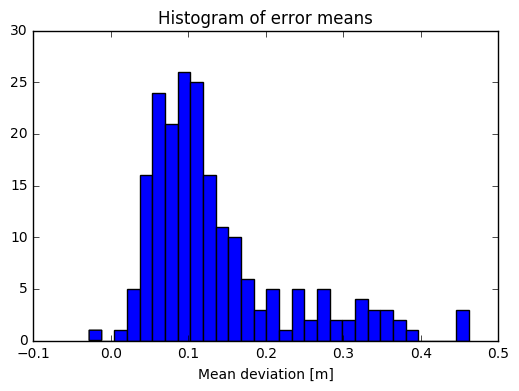

In [8]:
displayErrHistogram(S)
#displayErrHistogram(S_ns)

## Much finer distributions
Comparison with Lorentzian function with empirically chosen parameter

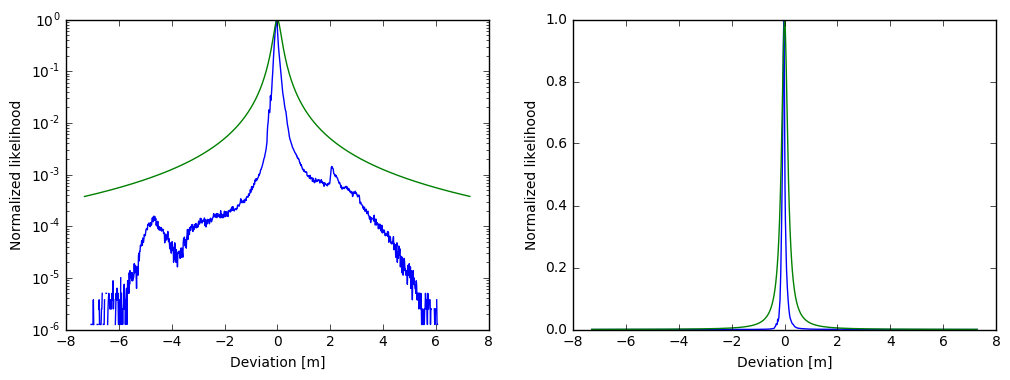

In [9]:
displayErrDistribution(E, H)
#displayErrDistribution(E_ns, H_ns)

Zoomed views on 10 % of value range and 25 % of range

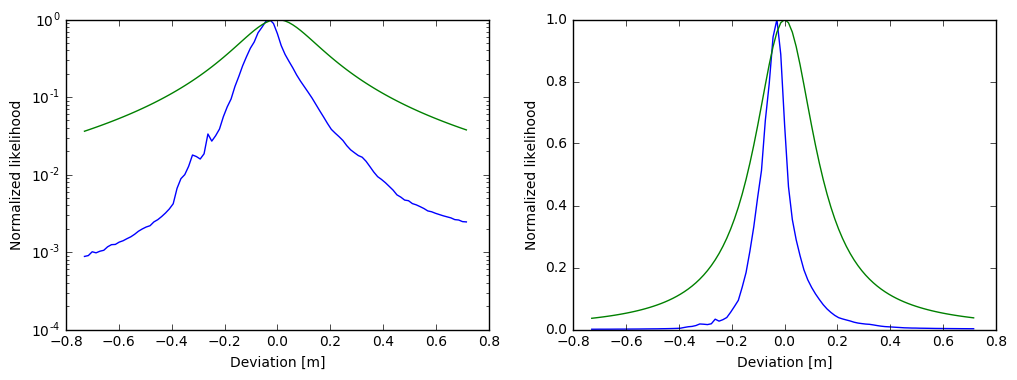

In [10]:
displayErrDistributionZoomed(E, H, 10)
#displayErrDistributionZoomed(E_ns, H_ns, 10)

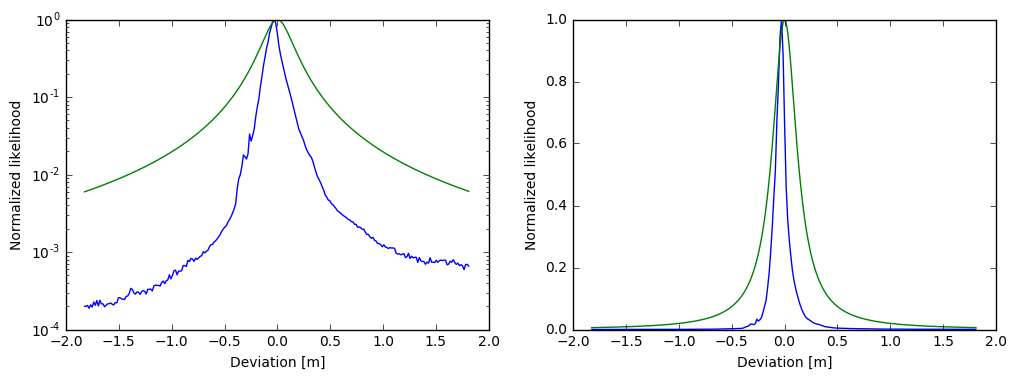

In [11]:
displayErrDistributionZoomed(E, H, 25)
#displayErrDistributionZoomed(E_ns, H_ns, 25)